AUTHOR: TUSHAR MITTAL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path

path_to_directory = Path("/content/drive/MyDrive/titanic")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, log_loss, classification_report, confusion_matrix, precision_score, recall_score, roc_curve

In [ ]:
training_data = pd.read_csv(path_to_directory / "train.csv")
df_train = pd.DataFrame(training_data)
df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

# **ANALYSIS OF DATA**

In [ ]:
!pip install -q ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.0 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport
ProfileReport(df_train, explorative=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 45.12it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

This analysis gives a very detailed overview of the entire dataset. Some of the key details being:
1. Sex is highly overall correlated with Survived	High correlation.
2. Age has 177 (19.9%) missing values	Missing.
3. Cabin has 687 (77.1%) missing values	Missing
4. PassengerId is uniformly distributed	Uniform
5. PassengerId has unique values	Unique
6. Name has unique values	Unique
7. SibSp has 608 (68.2%) zeros	Zeros
8. Parch has 678 (76.1%) zeros	Zeros
9. Fare has 15 (1.7%) zeros

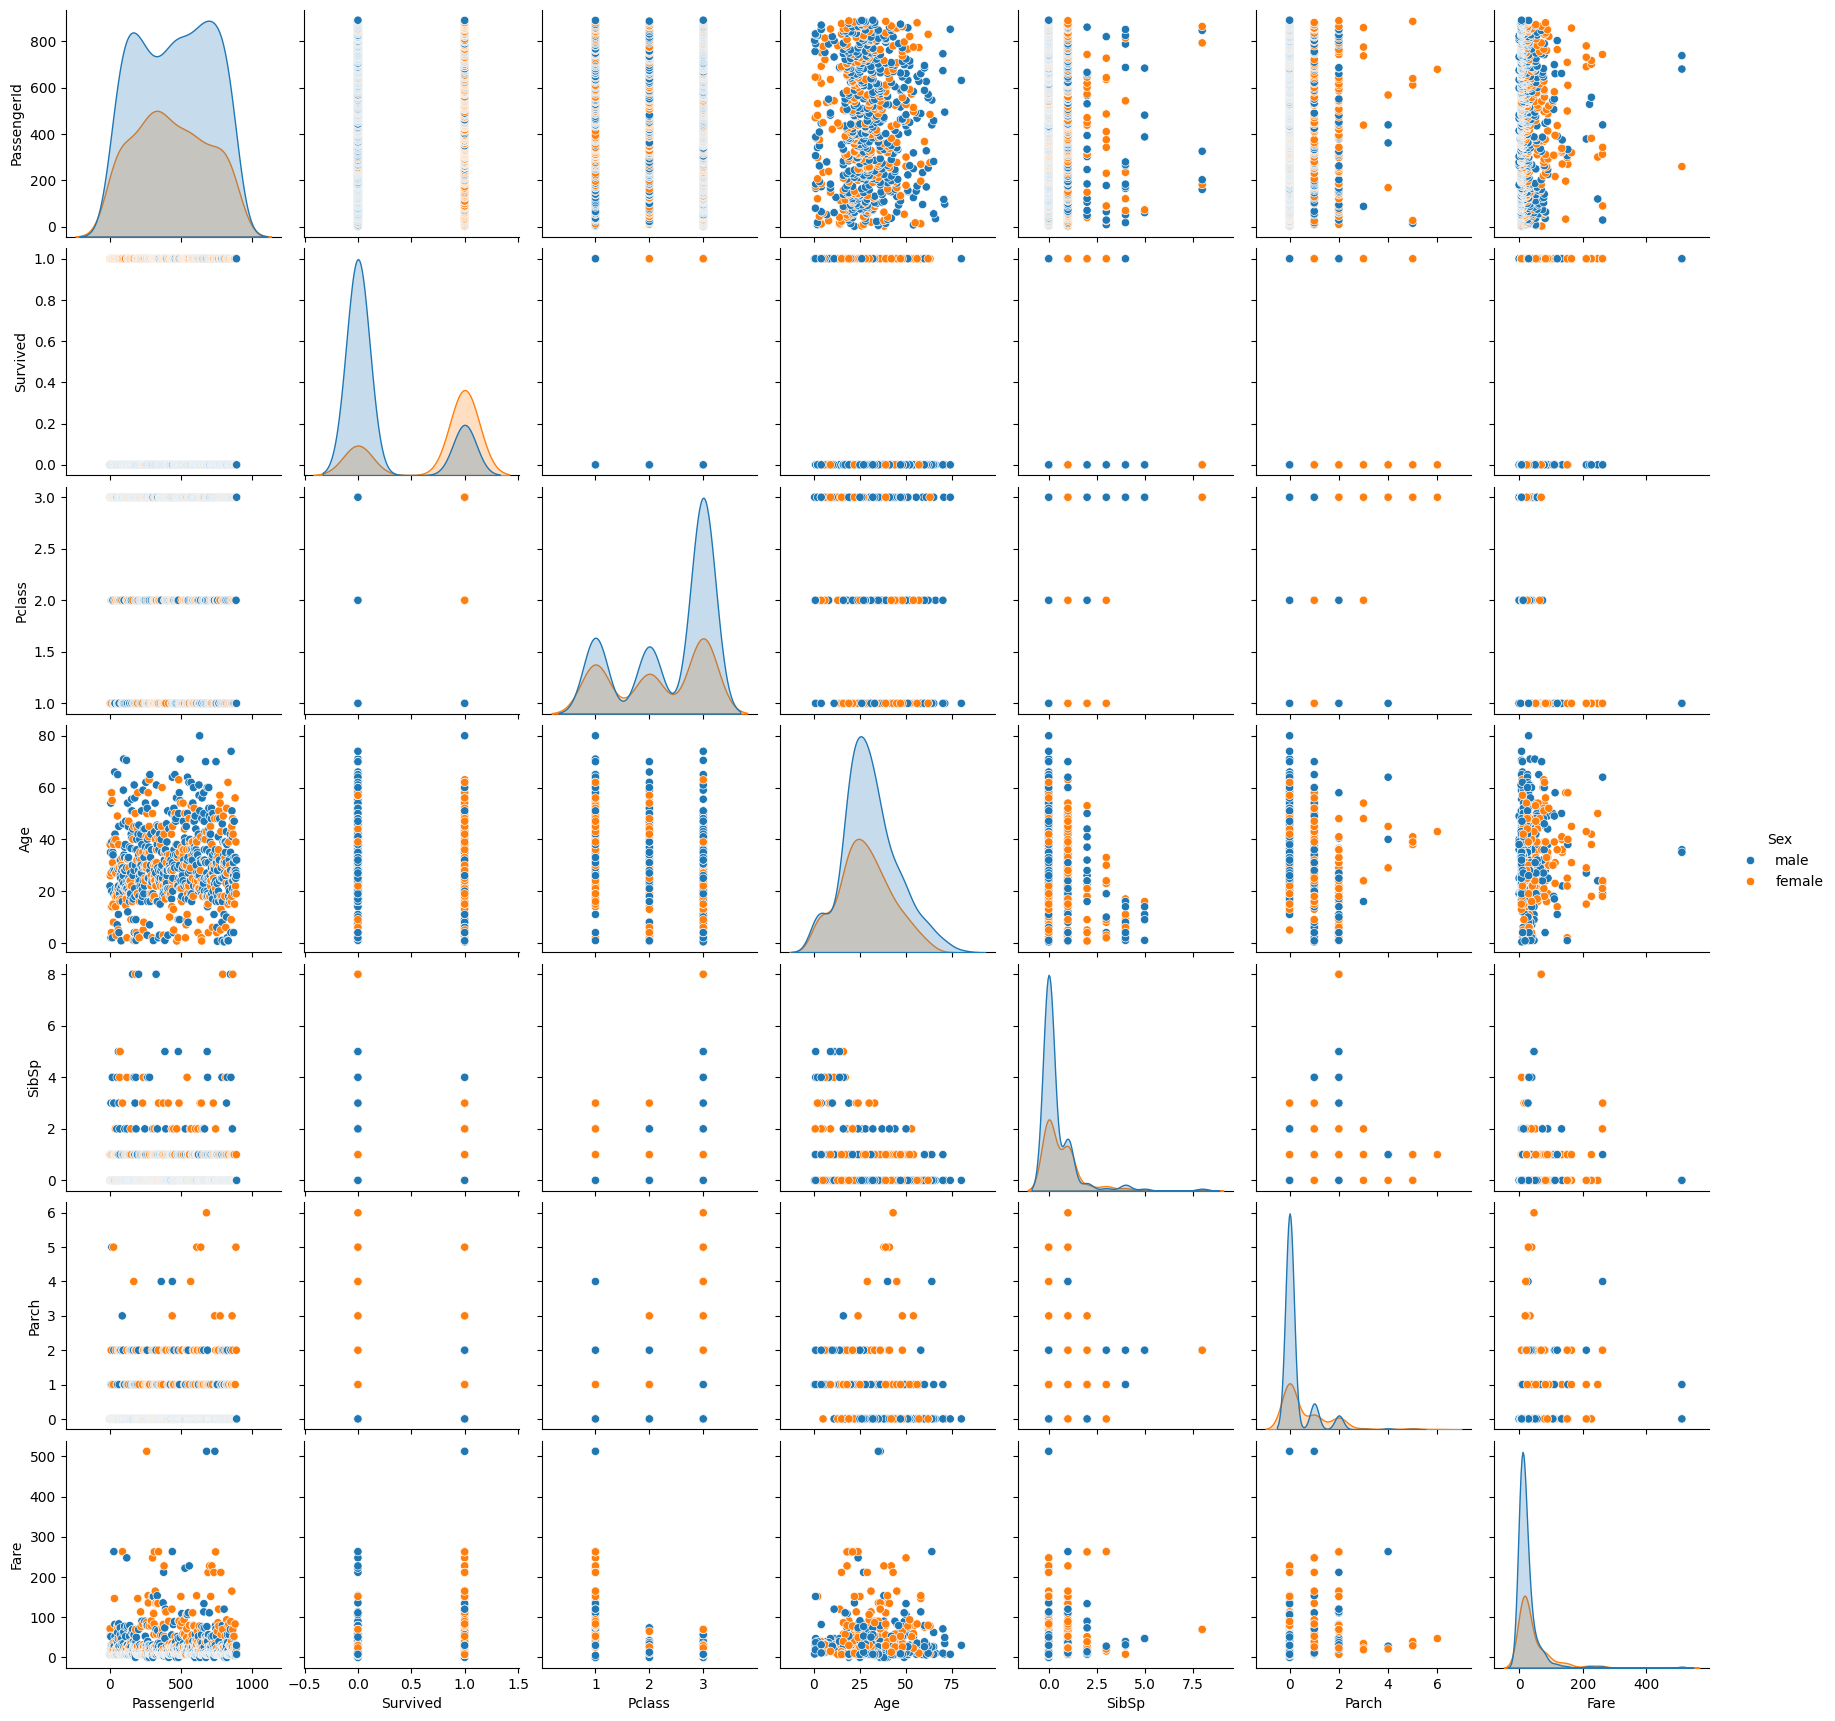

In [ ]:
#Creating a Pairplot to Explore Relationships
sns.pairplot(df_train, hue="Sex", diag_kind="kde")
plt.show()

Key Insights from the above graph:
*   The age distribution is different for men and women.
*   The fare vs. age plot shows that some passengers paid significantly higher fares.
*   KDE plots on the diagonal provide insights into variable distributions.



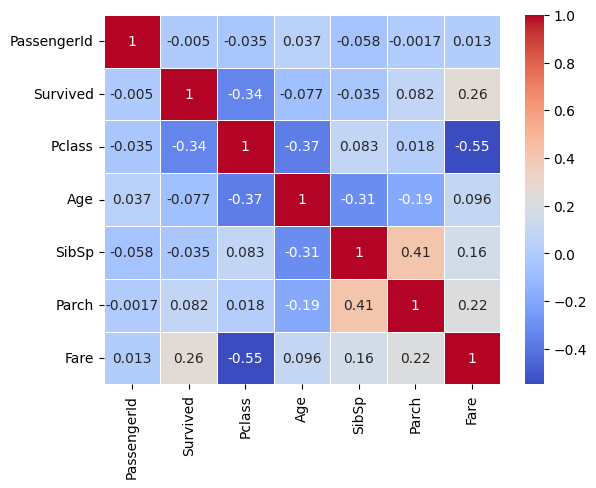

In [ ]:
#Visualizing Correlation with a Heatmap
corr = df_train.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

Observations:
* Fare and pclass have a negative correlation, meaning first-class passengers paid higher fares.
* Survival rate is positively correlated with ticket class, indicating first-class passengers had a higher survival rate.


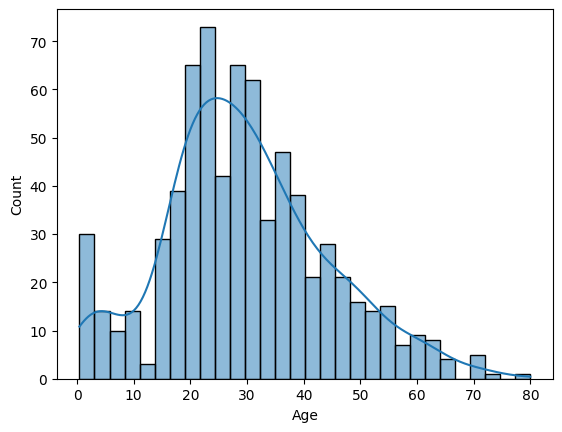

In [ ]:
# Distribution of Age with a Histogram
sns.histplot(df_train["Age"], bins=30, kde=True)
plt.show()

Interpretation:
* Most passengers were between 20 and 40 years old.
* The KDE curve shows a smooth distribution of ages.

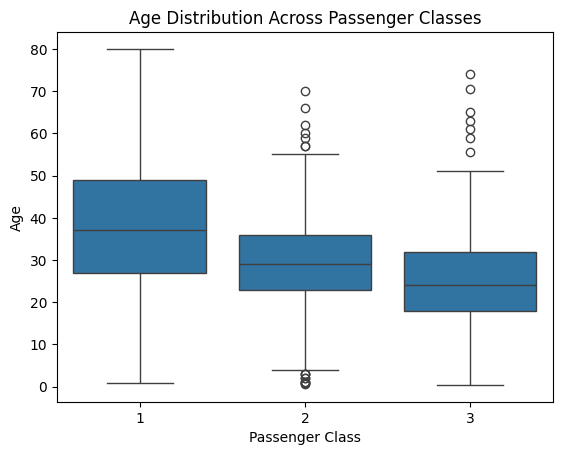

In [ ]:
# Comparing Passenger Classes with a Box Plot
sns.boxplot(x='Pclass', y='Age', data=df_train)
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.title('Age Distribution Across Passenger Classes')
plt.show()

Key Insights
* First-class passengers were generally older compared to second and third-class passengers.
* Third-class passengers had a broader range of ages with more young passengers.

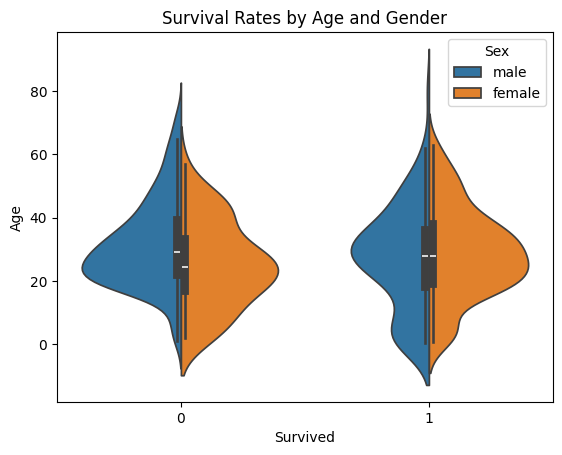

In [ ]:
# Comparing Survival Rates with a Violin Plot
sns.violinplot(x='Survived', y='Age', data=df_train, hue='Sex', split=True)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Survival Rates by Age and Gender')
plt.show()

Analysis
* First-class passengers had a higher survival rate, indicated by the wider upper region in the violin plot.
* Third-class passengers had a lower survival rate, with a significant portion of younger passengers.

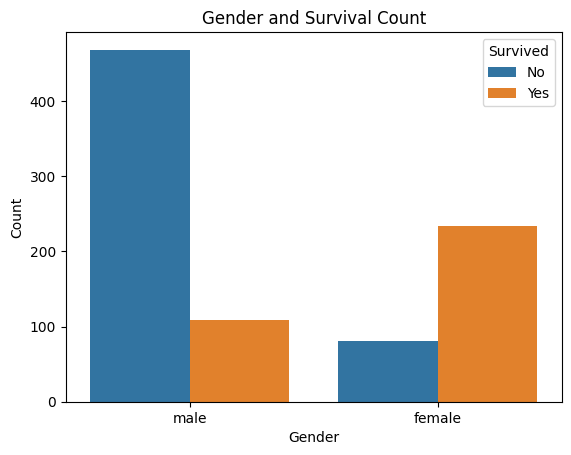

In [ ]:
# Analyzing Gender and Survival with a Bar Plot
sns.countplot(x='Sex', hue='Survived', data=df_train)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender and Survival Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

Female passengers had a significantly higher survival rate than male passengers.
This confirms the historical “women and children first” policy followed during the Titanic disaster.

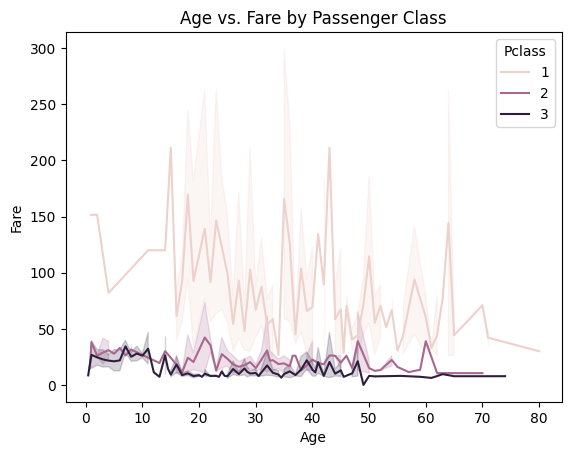

In [ ]:
# Analyzing Trends with a Line Plot
sns.lineplot(x="Age", y="Fare", hue="Pclass", data=df_train)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare by Passenger Class')
plt.show()

Insights
* The survival rate fluctuates across different ages.
* First-class passengers generally had higher survival rates across all ages.

# **DATA CLEANING**

In [ ]:
#Checking Missing Values per column
print("Missing values per column:")
print(df_train.isnull().sum())

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Cabin has 687/891 Missing values (77.1%)
# Since the ratio of missing observation units to total observation units is high, it seems like a logical decision to drop Cabin Variable from the data set.
# Feature Significance: The Cabin was only noted for First and Second Class passengers and not for third class passengers which makes you think whether that has an effect on the survival rate
# Lets make a separate column to just note whether the row has a cabin number
df_train['HasCabin'] = df_train['Cabin'].notna().astype(int)
df_train.groupby('HasCabin')['Survived'].mean()

HasCabin
0    0.299854
1    0.666667
Name: Survived, dtype: float64

In [ ]:
# Clearly the ones which have a recorded cabin value seem to have an effect on the Survival Rate. Hence, it cannot be dropped.
# Let's extract the important features as categorical feautures out of the Cabin as HasCabin and Deck and drop cabin.
df_train['Deck'] = df_train['Cabin'].str[0].fillna('U')
df_train.drop('Cabin', axis=1, inplace=True)
df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Embarked  HasCabin Deck  
0        0         A/5 21171   7.2500        S         0    U  
1        0          PC 17599  71.2833        C         1    C  
2        0  STON/O2. 3101282   7.9250        S         0    U  
3        0            113803  53.1000        S         1    C  
4        0            373450   8.0500        S         0    U  
..     ...               ...      ...      ...       ...  ...  
886      0            211536  13.0000        S         0    U  
887      0            112053  30.0000        S         1    B  
888      2        W./C. 6607  23.4500        S         0    U  
889      0            111369  30.0000        C         1    C  
890      0            370376   7.7500        Q         0    U  

[891 rows x 13 columns]

In [ ]:
# Age has 177 missing values out of 891 (19.8%)
# Use the passenger’s title extracted from Name and find median per Title since similar people would tend to be of the same age group.

# Extract titles
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)

print(df_train['Title'].unique())
print(df_train['Title'].value_counts())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


In [ ]:
# Fill by Title median
df_train['Age'] = df_train.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# Analysing the Embarked Feature to find what kind of data is present
print(df_train['Embarked'].unique())
print(df_train['Embarked'].value_counts())

['S' 'C' 'Q' nan]
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [ ]:
# Since the values are mostly categorical and the number of missing values is very small (2/891), Thus we choose to replace the missing values with the mode of the data.
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])


In [ ]:
# Dataframe After addressing missing values
df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  21.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Embarked  HasCabin Deck Title  
0        0         A/5 21171   7.2500        S         0    U    Mr  
1        0          PC 17599  71.2833        C         1    C   Mrs  
2        0  STON/O2. 3101282   7.9250        S         0    U  Miss  
3        0            113803  53.1000        S         1    C   Mrs  
4        0            373450   8.0500        S         0    U    Mr  
..     ...               ...      ...      ...       ...  ...   ...  
886      0            211536  13.0000        S         0    U   Rev  
887      0            112053  30.0000        S         1    B  Miss  
888      2        W./C. 6607  23.4500        S         0    U  Miss  
889      0            111369  30.0000        C         1    C    Mr  
890      0            370376   7.7500        Q         0    U    Mr  

[891 rows x 14 columns]

In [ ]:
print(df_train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
HasCabin       0
Deck           0
Title          0
dtype: int64


All the null values have been taken care of.

In [ ]:
# Checking for Title-Sex Inconsistencies
if {'Name','Sex'}.issubset(df_train.columns):
    title = df_train['Name'].astype('string').str.extract(r',\s*([^.]*)\.', expand=False).str.strip()
    female_titles = {'Mrs','Miss','Mme','Mlle','Lady','Countess','Ms'}
    male_titles   = {'Mr','Master','Sir','Don','Col','Major','Capt','Jonkheer','Rev'}
    bad_title_sex = df_train[
        (title.isin(female_titles) & (df_train['Sex']=='male')) |
        (title.isin(male_titles) & (df_train['Sex']=='female'))
    ]
    print("Title–Sex inconsistencies:", bad_title_sex)

Title–Sex inconsistencies: Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked, HasCabin, Deck, Title]
Index: []


There is no inconsistency in  title and sex. Hence, the data, is accurate

In [ ]:
# Checking for Invalid values
issues = {}
if 'Age' in df_train:
    issues['Age_lt0_or_gt100'] = df_train[(df_train['Age']<0)].shape[0]
if 'Fare' in df_train:
    issues['Fare_negative'] = df_train[df_train['Fare']<0].shape[0]
if 'Pclass' in df_train:
    issues['Pclass_invalid'] = df_train[~df_train['Pclass'].isin([1,2,3]) & df_train['Pclass'].notna()].shape[0]
issues

{'Age_lt0_or_gt100': 0, 'Fare_negative': 0, 'Pclass_invalid': 0}

There are no invalid values needed to be taken care of.

In [ ]:
# Checking for Family Sizes
if {'SibSp','Parch'}.issubset(df_train.columns):
    fam = df_train['SibSp'].fillna(0) + df_train['Parch'].fillna(0) + 1
    family_mismatch = (df_train.get('FamilySize', fam) != fam).sum() if 'FamilySize' in df_train else 0
    print("Family size mismatches:", family_mismatch)

Family size mismatches: 0


There is no mismatch in the family size.

# **FEATURE ENGINEERING**

Introducing Family Size and hasFamily Columns to find out whether the chance of survival varies whether the passenger had a family or not.

In [ ]:
# Calculate Family Size
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

#Create Binary Feature based on family Size
df_train['hasFamily'] = (df_train['FamilySize'] > 1).astype('int8')

df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  21.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Embarked  HasCabin Deck Title  \
0        0         A/5 21171   7.2500        S         0    U    Mr   
1        0          PC 17599  71.2833        C         1    C   Mrs   
2        0  STON/O2. 3101282   7.9250        S         0    U  Miss   
3        0            113803  53.1000        S         1    C   Mrs   
4        0            373450   8.0500        S         0    U    Mr   
..     ...               ...      ...      ...       ...  ...   ...   
886      0            211536  13.0000        S         0    U   Rev   
887      0            112053  30.0000        S         1    B  Miss   
888      2        W./C. 6607  23.4500        S         0    U  Miss   
889      0            111369  30.0000        C         1    C    Mr   
890      0            370376   7.7500        Q         0    U    Mr   

     FamilySize  hasFamily  
0             2          1  
1             2          1  
2             1          0  
3             2          1  
4             1          0  
..          ...        ...  
886           1          0  
887           1          0  
888           4          1  
889           1          0  
890           1          0  

[891 rows x 16 columns]

In [ ]:
df_train.groupby('hasFamily')['Survived'].mean()

hasFamily
0    0.303538
1    0.505650
Name: Survived, dtype: float64

Having a family impacts the survival rate according to the above matrix.

In [ ]:
# Convert categorical features: Sex, Embarked, Title, Deck into numeric using one-hot encoding method
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked', 'Title', 'Deck'], drop_first=True)
bool_cols = df_train.select_dtypes(include=['bool']).columns
df_train[bool_cols] = df_train[bool_cols].astype(int)

# Scale numerical features using Standard Scaler
scaler = StandardScaler()
num_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass', 'FamilySize']
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

print(df_train.head())

   PassengerId  Survived    Pclass  \
0            1         0  0.827377   
1            2         1 -1.566107   
2            3         1  0.827377   
3            4         1 -1.566107   
4            5         0  0.827377   

                                                Name       Age     SibSp  \
0                            Braund, Mr. Owen Harris -0.557420  0.432793   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.649410  0.432793   
2                             Heikkinen, Miss. Laina -0.255712 -0.474545   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.423129  0.432793   
4                           Allen, Mr. William Henry  0.423129 -0.474545   

      Parch            Ticket      Fare  HasCabin  ...  Title_Rev  Title_Sir  \
0 -0.473674         A/5 21171 -0.502445         0  ...          0          0   
1 -0.473674          PC 17599  0.786845         1  ...          0          0   
2 -0.473674  STON/O2. 3101282 -0.488854         0  ...          0         

# **MODEL TRAINING**

In [ ]:
# Target and features are defined. Some Extraneous columns are removed in the process.
y = df_train['Survived'].astype(int)
X = df_train.drop(columns=[c for c in ['Survived','PassengerId','Name','Ticket'] if c in df_train])

#Defining Seed Value for constant results
Seed = 42

# Create an 80/20 train-test split
X_trval, X_test, y_trval, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=Seed)

#From the remaining 80%, carve validation set worth 12.5% - (10% of Total)
X_train, X_val,  y_train,  y_val  = train_test_split(X_trval, y_trval, test_size=0.125, stratify=y_trval, random_state=Seed)

# Check the Shape to confirm split
print(f"Training samples: {X_train.shape[0]}")

Training samples: 623


**BERNOULLI NAIVE BAYES**

In [ ]:
# Types of Columns:
onehot_cols = [c for c in X_train.columns if c.startswith(('Sex_','Embarked_','Title_','Deck_'))]
bin_cols    = [c for c in X_train.columns if c in ['HasCabin','IsAlone','hasFamily']]
cont_cols   = [c for c in ['Age','Fare','FamilySize'] if c in X_train.columns]  # Truly continuous features -> will be quantile-binned to binary one-hots for BernoulliNB


#Column Transformations
# Continuous: median-impute -> KBins (quantile, 4 bins) -> one-hot (binary)
# One-hots + binary flags: pass through
pre_bnb = ColumnTransformer(transformers=[('cont', Pipeline([('imp', SimpleImputer(strategy='median')),('kb', KBinsDiscretizer(n_bins=4, strategy='quantile', encode='onehot'))]), cont_cols),('ohe_passthrough', 'passthrough', onehot_cols + bin_cols),],remainder='drop')

def evaluate_bnb(alpha):
    clf = Pipeline([('pre', pre_bnb), ('nb', BernoulliNB(alpha=alpha))])
    clf.fit(X_train, y_train)
    p_val = clf.predict_proba(X_val)[:, 1]
    yhat_val = (p_val >= 0.5).astype(int)
    return dict(
        alpha=alpha,
        acc=accuracy_score(y_val, yhat_val),
        precision=precision_score(y_val, yhat_val, zero_division=0),
        recall=recall_score(y_val, yhat_val, zero_division=0),
        f1=f1_score(y_val, yhat_val, zero_division=0),
        roc=roc_auc_score(y_val, p_val),
        logloss=log_loss(y_val, np.clip(p_val, 1e-12, 1-1e-12)),
        model=clf
    )

res = [evaluate_bnb(a) for a in (1.0, 0.01)]

# Pick the model with the best validation ROC-AUC
best = max(res, key=lambda d: d['roc'])
print("Validation comparison (higher ROC/AUC is better):")
print(pd.DataFrame([{k:v for k,v in d.items() if k!='model'} for d in res]).to_string(index=False))
print(f"\nSelected α on validation: {best['alpha']}")

# Refit best on train+val, test on holdout
best_model = best['model'].fit(pd.concat([X_train,X_val]), pd.concat([y_train,y_val]))
p_test = best_model.predict_proba(X_test)[:,1]
yhat_test = (p_test>=0.5).astype(int)

acc   = accuracy_score(y_test, yhat_test)
prec  = precision_score(y_test, yhat_test, zero_division=0)
rec   = recall_score(y_test, yhat_test, zero_division=0)
f1    = f1_score(y_test, yhat_test, zero_division=0)
auc_  = roc_auc_score(y_test, p_test)
ll    = log_loss(y_test, np.clip(p_test, 1e-12, 1-1e-12))
cm    = confusion_matrix(y_test, yhat_test)

print(f"Accuracy={acc:.3f}  Precision={prec:.3f}  Recall={rec:.3f}  F1={f1:.3f}  ROC-AUC={auc_:.3f}  LogLoss={ll:.3f}")

Validation comparison (higher ROC/AUC is better):
 alpha      acc  precision   recall       f1      roc  logloss
  1.00 0.786517   0.714286 0.735294 0.724638 0.838770 0.823492
  0.01 0.775281   0.694444 0.735294 0.714286 0.837166 0.852906

Selected α on validation: 1.0
Accuracy=0.732  Precision=0.633  Recall=0.725  F1=0.676  ROC-AUC=0.779  LogLoss=1.036


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(


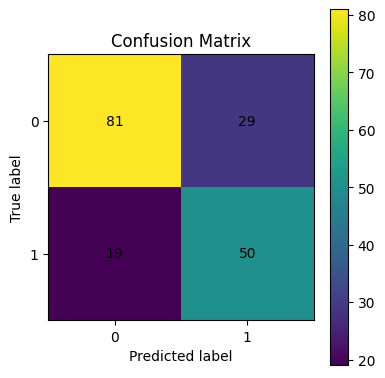

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
im = ax.imshow(cm, interpolation='nearest')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_xticks([0, 1]); ax.set_yticks([0, 1])
# add count labels
for (i, j), v in np.ndenumerate(cm):
    ax.text(j, i, str(v), ha='center', va='center')
plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

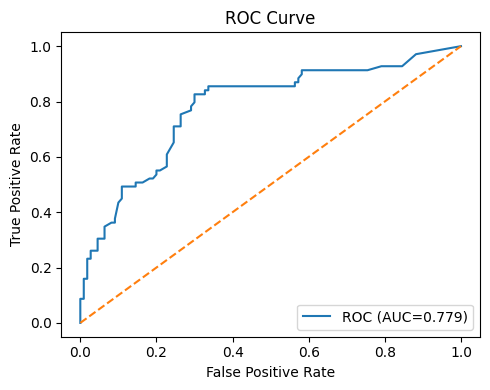

In [ ]:
fpr, tpr, _ = roc_curve(y_test, p_test)
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(fpr, tpr, label=f'ROC (AUC={auc_:.3f})')
ax.plot([0,1], [0,1], linestyle='--')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
# --- Train on TRAIN, validate on VAL ---
lr = LinearRegression()
lr.fit(X_train, y_train)

# Validation
y_hat_val = lr.predict(X_val)
# Treat scores as probabilities by clipping to [0,1]
p_val = np.clip(y_hat_val, 1e-6, 1-1e-6)
# 0.5 threshold to turn probabilities into class labels
y_pred_val = (p_val >= 0.5).astype(int)

val_acc   = accuracy_score(y_val, y_pred_val)
val_prec  = precision_score(y_val, y_pred_val, zero_division=0)
val_rec   = recall_score(y_val, y_pred_val, zero_division=0)
val_f1    = f1_score(y_val, y_pred_val, zero_division=0)
val_auc   = roc_auc_score(y_val, p_val)
val_ll    = log_loss(y_val, p_val)
val_cm    = confusion_matrix(y_val, y_pred_val)

print(f"VALIDATION — Linear Regression as classifier")
print(f"Accuracy={val_acc:.3f}  Precision={val_prec:.3f}  Recall={val_rec:.3f}  "
      f"F1={val_f1:.3f}  ROC-AUC={val_auc:.3f}  LogLoss={val_ll:.3f}")
print("Confusion matrix (rows=Actual, cols=Predicted):\n", val_cm)

# --- Refit on TRAIN+VAL, evaluate on TEST ---
X_trval_full = pd.concat([X_train, X_val], axis=0)
y_trval_full = pd.concat([y_train, y_val], axis=0)

lr_final = LinearRegression()
lr_final.fit(X_trval_full, y_trval_full)

# Predict on the untouched test set
y_hat_test = lr_final.predict(X_test)
p_test = np.clip(y_hat_test, 1e-6, 1-1e-6)
y_pred_test = (p_test >= 0.5).astype(int)

acc   = accuracy_score(y_test, y_pred_test)
prec  = precision_score(y_test, y_pred_test, zero_division=0)
rec   = recall_score(y_test, y_pred_test, zero_division=0)
f1    = f1_score(y_test, y_pred_test, zero_division=0)
auc_  = roc_auc_score(y_test, p_test)
ll    = log_loss(y_test, p_test)
cm    = confusion_matrix(y_test, y_pred_test)

print(f"\nTEST — Linear Regression as classifier")
print(f"Accuracy={acc:.3f}  Precision={prec:.3f}  Recall={rec:.3f}  "
      f"F1={f1:.3f}  ROC-AUC={auc_:.3f}  LogLoss={ll:.3f}")
print("Confusion matrix (rows=Actual, cols=Predicted):\n", cm)

print("\nClassification report:\n", classification_report(y_test, y_pred_test, digits=3, zero_division=0))

VALIDATION — Linear Regression as classifier
Accuracy=0.865  Precision=0.867  Recall=0.765  F1=0.812  ROC-AUC=0.883  LogLoss=0.524
Confusion matrix (rows=Actual, cols=Predicted):
 [[51  4]
 [ 8 26]]

TEST — Linear Regression as classifier
Accuracy=0.844  Precision=0.815  Recall=0.768  F1=0.791  ROC-AUC=0.861  LogLoss=0.511
Confusion matrix (rows=Actual, cols=Predicted):
 [[98 12]
 [16 53]]

Classification report:
               precision    recall  f1-score   support

           0      0.860     0.891     0.875       110
           1      0.815     0.768     0.791        69

    accuracy                          0.844       179
   macro avg      0.838     0.830     0.833       179
weighted avg      0.843     0.844     0.843       179



In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
im = ax.imshow(cm, interpolation='nearest')
ax.set_title('Confusion Matrix — Linear Regression')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_xticks([0, 1]); ax.set_yticks([0, 1])
for (i, j), v in np.ndenumerate(cm):
    ax.text(j, i, str(v), ha='center', va='center')
plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

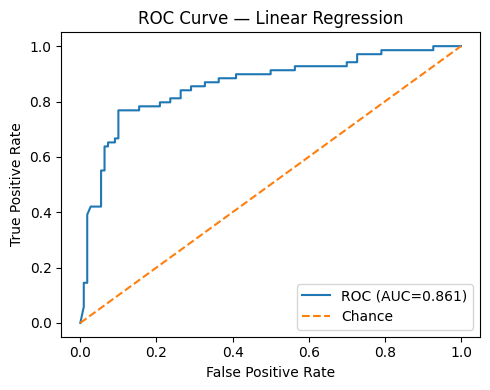

In [ ]:
fpr, tpr, _ = roc_curve(y_test, p_test)
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(fpr, tpr, label=f'ROC (AUC={auc_:.3f})')
ax.plot([0, 1], [0, 1], '--', label='Chance')
ax.set_title('ROC Curve — Linear Regression')
ax.set_xlabel('False Positive Rate'); ax.set_ylabel('True Positive Rate')
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()

Ridge (validation):
         acc  precision    recall        f1       roc   logloss   alpha
0  0.853933   0.862069  0.735294  0.793651  0.884225  0.406939  10.000
1  0.865169   0.866667  0.764706  0.812500  0.882086  0.525936   0.001
2  0.865169   0.866667  0.764706  0.812500  0.881551  0.525942   0.010
3  0.865169   0.866667  0.764706  0.812500  0.881551  0.525995   0.100
4  0.865169   0.866667  0.764706  0.812500  0.881016  0.526336   1.000

Ridge α=10.0 — TEST (τ=0.5)
Accuracy=0.844  Precision=0.803  Recall=0.768  F1=0.785  ROC-AUC=0.861  LogLoss=0.513
Confusion matrix (rows=Actual, cols=Predicted):
 [[97 13]
 [16 53]]

Classification report:
               precision    recall  f1-score   support

           0      0.858     0.882     0.870       110
           1      0.803     0.768     0.785        69

    accuracy                          0.838       179
   macro avg      0.831     0.825     0.828       179
weighted avg      0.837     0.838     0.837       179



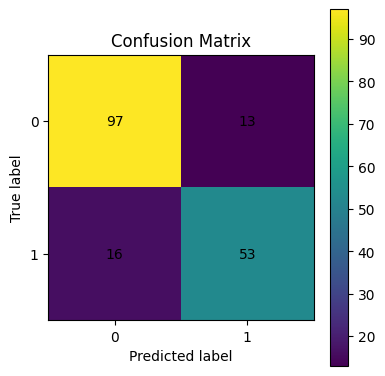

In [ ]:
# Fit on TRAIN, evaluate on VAL at threshold=0.5; treat regression output as probability-like score
def eval_regressor(model, X_tr, y_tr, X_va, y_va, threshold=0.5):
    model.fit(X_tr, y_tr)
    y_score = model.predict(X_va)
    p = np.clip(y_score, 1e-6, 1-1e-6)
    y_pred = (p >= threshold).astype(int)
    return {
        "acc": accuracy_score(y_va, y_pred),
        "precision": precision_score(y_va, y_pred, zero_division=0),
        "recall": recall_score(y_va, y_pred, zero_division=0),
        "f1":  f1_score(y_va, y_pred, zero_division=0),
        "roc": roc_auc_score(y_va, p),
        "logloss": log_loss(y_va, p),
        "model": model
    }

# Evaluate on TEST and plot CM heatmap + ROC curve
def report_test(model, X_te, y_te, label="", threshold=0.5):
    y_score = model.predict(X_te)
    p = np.clip(y_score, 1e-6, 1-1e-6)
    y_pred = (p >= 0.5).astype(int)

    cc  = accuracy_score(y_te, y_pred)
    prec = precision_score(y_te, y_pred, zero_division=0)
    rec  = recall_score(y_te, y_pred, zero_division=0)
    f1   = f1_score(y_te, y_pred, zero_division=0)
    auc_ = roc_auc_score(y_te, p)           # AUC uses probabilities
    ll   = log_loss(y_te, p)
    cm   = confusion_matrix(y_te, y_pred)

    print(f"\n{label} — TEST (τ={threshold})")
    print(f"Accuracy={acc:.3f}  Precision={prec:.3f}  Recall={rec:.3f}  F1={f1:.3f}  ROC-AUC={auc_:.3f}  LogLoss={ll:.3f}")
    print("Confusion matrix (rows=Actual, cols=Predicted):\n", cm)
    print("\nClassification report:\n",classification_report(y_te, y_pred, digits=3, zero_division=0))

    # Visualization A: Confusion Matrix heatmap
    fig, ax = plt.subplots(figsize=(4, 4))
    im = ax.imshow(cm, interpolation='nearest')
    ax.set_title(f'Confusion Matrix')
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_xticks([0, 1]); ax.set_yticks([0, 1])
    for (i, j), v in np.ndenumerate(cm):
        ax.text(j, i, str(v), ha='center', va='center')
    plt.colorbar(im, ax=ax)
    plt.tight_layout()
    plt.show()

    print(f'\n')

    # Visualization: ROC curve
    fpr, tpr, _ = roc_curve(y_te, p)
    fig, ax = plt.subplots(figsize=(5, 4))
    ax.plot(fpr, tpr, label=f'AUC={auc_:.3f}')
    ax.plot([0, 1], [0, 1], '--', label='Chance')
    ax.set_title(f'ROC Curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

    print(f'\n')

# Pipelines: scale inside the pipeline (no data leakage)
ridge_grid = [0.001, 0.01, 0.1, 1.0, 10.0]
lasso_grid = [0.0005, 0.001, 0.01, 0.1, 1.0]  # Lasso is sensitive to alpha

# RIDGE REGRESSION
ridge_val = []
for a in ridge_grid:
  ridge = Pipeline([("sc", StandardScaler()),("mdl", Ridge(alpha=a, random_state=42))])
  m = eval_regressor(ridge, X_train, y_train, X_val, y_val)
  m["alpha"] = a
  ridge_val.append(m)

ridge_tbl = (pd.DataFrame([{k: v for k, v in r.items() if k != "model"} for r in ridge_val]).sort_values("roc", ascending=False).reset_index(drop=True))
print("Ridge (validation):\n", ridge_tbl)

best_ridge_alpha = max(ridge_val, key=lambda d: d["roc"])["alpha"]
best_ridge = Pipeline([("sc", StandardScaler()),("mdl", Ridge(alpha=best_ridge_alpha, random_state=42))]).fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))
report_test(best_ridge, X_test, y_test, label=f"Ridge α={best_ridge_alpha}")


Lasso (validation):
         acc  precision    recall        f1       roc   logloss   alpha
0  0.842697   0.857143  0.705882  0.774194  0.888503  0.390790  0.0100
1  0.865169   0.866667  0.764706  0.812500  0.884225  0.403711  0.0005
2  0.853933   0.862069  0.735294  0.793651  0.884225  0.399031  0.0010
3  0.786517   0.758621  0.647059  0.698413  0.855882  0.501961  0.1000
4  0.617978   0.000000  0.000000  0.000000  0.500000  0.665051  1.0000

Lasso α=0.01 — TEST (τ=0.5)
Accuracy=0.844  Precision=0.794  Recall=0.725  F1=0.758  ROC-AUC=0.862  LogLoss=0.446
Confusion matrix (rows=Actual, cols=Predicted):
 [[97 13]
 [19 50]]

Classification report:
               precision    recall  f1-score   support

           0      0.836     0.882     0.858       110
           1      0.794     0.725     0.758        69

    accuracy                          0.821       179
   macro avg      0.815     0.803     0.808       179
weighted avg      0.820     0.821     0.820       179



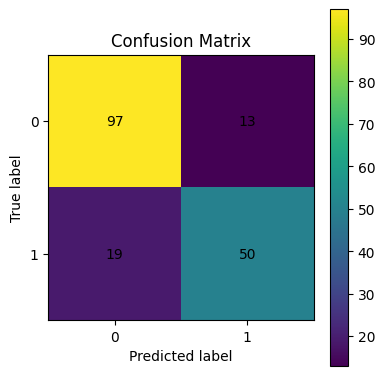

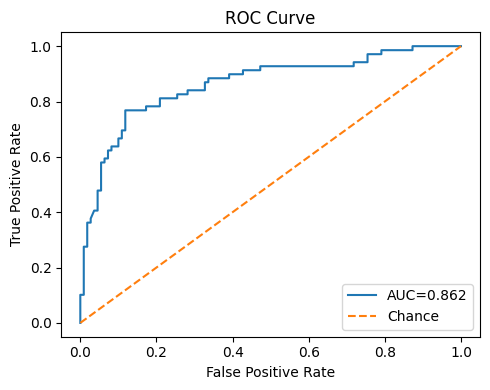

In [ ]:
# LASSO REGRESSION
lasso_val = []
for a in lasso_grid:
  lasso = Pipeline([("sc", StandardScaler()),("mdl", Lasso(alpha=a, max_iter=5000, random_state=42))])
  m = eval_regressor(lasso, X_train, y_train, X_val, y_val)
  m["alpha"] = a
  lasso_val.append(m)

lasso_tbl = pd.DataFrame([{k:v for k,v in r.items() if k not in ("model",)} for r in lasso_val]).sort_values("roc", ascending=False).reset_index(drop=True)
print("\nLasso (validation):\n", lasso_tbl)

best_lasso_alpha = max(lasso_val, key=lambda d: d["roc"])["alpha"]
best_lasso = Pipeline([("sc", StandardScaler()),("mdl", Lasso(alpha=best_lasso_alpha, max_iter=5000, random_state=42))]).fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))
report_test(best_lasso, X_test, y_test, label=f"Lasso α={best_lasso_alpha}")

In [ ]:
est = best_lasso.named_steps['mdl']
coef = pd.Series(est.coef_, index=X_train.columns, name='coef')

# Identify exact (or near) zeros
tol = 1e-12
is_zero = coef.abs() <= tol

print(f"Non-zero features: {(~is_zero).sum()} / {len(coef)} "
      f"({100*(~is_zero).mean():.1f}%)")
print(f"Zeroed features  : {is_zero.sum()} / {len(coef)} "
      f"({100*is_zero.mean():.1f}%)\n")

# Top contributors among non-zero coefficients
top_pos = coef[~is_zero].sort_values(ascending=False).head(10)
top_neg = coef[~is_zero].sort_values(ascending=True).head(10)

print("Top + (most positive):\n", top_pos)
print("\nTop - (most negative):\n", top_neg)

Non-zero features: 22 / 35 (62.9%)
Zeroed features  : 13 / 35 (37.1%)

Top + (most positive):
 HasCabin        0.036671
Title_Mrs       0.030873
Deck_E          0.024915
Deck_D          0.023736
Title_Master    0.020314
Fare            0.014988
Deck_F          0.007091
Title_Major     0.005337
Title_Sir       0.004418
Title_Ms        0.001774
Name: coef, dtype: float64

Top - (most negative):
 Title_Mr         -0.144237
Sex_male         -0.095169
Pclass           -0.080008
FamilySize       -0.047477
Age              -0.047305
Title_Rev        -0.025026
Embarked_S       -0.023960
SibSp            -0.019462
Title_Don        -0.012438
Title_Jonkheer   -0.010366
Name: coef, dtype: float64
